In [3]:
%run setup

In [4]:
import os
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import re
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
import re
import pandas as pd
from sklearn import metrics

In [5]:
%matplotlib inline

# Data loading

In [6]:
def clean(document):
    document = " ".join(document.split())
    document = document.lower()
    return document

In [7]:
train_data_dir_path = "data2/train"
test_data_dir_path = "data2/test"
test_labels_path = "data2/labels_test.csv"

In [8]:
train_documents, train_labels = read_documents_in_dir(train_data_dir_path, True)

In [9]:
test_documents = read_documents_in_dir(test_data_dir_path, False)

In [10]:
with open(test_labels_path) as f:
    test_labels = [int(x.strip()) for x in f.read().split(",")]

In [11]:
train_documents = [clean(d) for d in train_documents]

In [12]:
print(train_documents[0][:300],"...")

boldly going... nowhere! the star trek universe, resplendent in gene roddenberry's vision of a future wherein mankind has finally "got its act together," while its social and economic problems are generally a thing of the past. not in jj abrams' universe however, in which a corrupt starfleet admiral ...


In [13]:
test_documents = [clean(d) for d in test_documents]

In [14]:
print(test_documents[0])

the extreme worst of all resident evil series i love resident evil series. despite the mediocre reviews it gets in the past, i still go to the cinema on its release and always looking forward for the next sequel. but re5 fails beyond believe. the storyline is utterly crap. the action are cheesy, the actors are cheesy, the whole movie is a joke to the re series. i am completely disappointed at how the whole movie turns out to be.*spoiler alert* the whole movie is set on one giant umbrella underwater laboratory and alice and friends is trying to break out of it. along the way they encounter some zombies and finally got out. and that's literally about the summary of the whole story!they try to use music to intensify everything.. but it becomes very cheesy. especially towards the end before the final fight when jill walks out of the submarine.the red queen is total crap. cheesy, stupid.. the fighting scene itself is very cheesy and unrealistic. they hardly get hit by a bullet even when the

In [15]:
target_names = ["negative", "positive"]

## Create binary labels from the label data

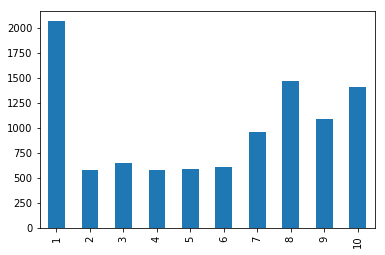

In [16]:
pd.Series(train_labels).value_counts(sort=False).sort_index().plot.bar()

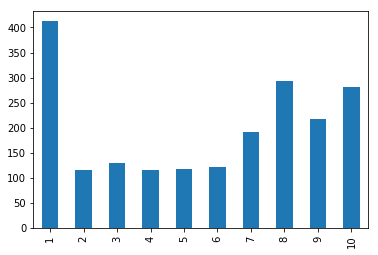

In [17]:
pd.Series(test_labels).value_counts(sort=False).sort_index().plot.bar()

In [18]:
train_labels_binary = [1 if label >= 7 else 0 for label in train_labels]

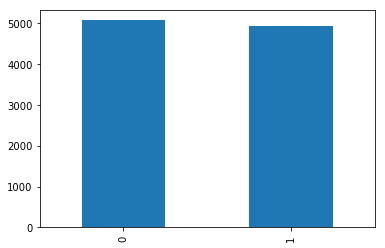

In [19]:
pd.Series(train_labels_binary).value_counts(sort=False).sort_index().plot.bar()

In [20]:
test_labels_binary = [1 if label >= 7 else 0 for label in test_labels]

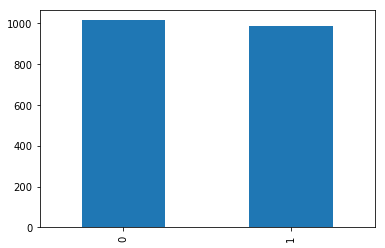

In [21]:
pd.Series(test_labels_binary).value_counts(sort=False).sort_index().plot.bar()

# Model fitting

In [22]:
preprocessors = {"tfidf_word": TfidfVectorizer(min_df=5),
                 "tfidf_word_bigrams": TfidfVectorizer(min_df=5, ngram_range=(1,2)),
                 "tfidf_char": TfidfVectorizer(min_df=5, analyzer='char_wb', ngram_range=(3,3)),
                 "countvec_word": CountVectorizer(min_df=5),
                 "countvec_word_bigrams": CountVectorizer(min_df=5, ngram_range=(1,2)),
                 "countvec_char": CountVectorizer(min_df=5, analyzer='char_wb', ngram_range=(3,3))}

In [23]:
classifiers = {"logreg": LogisticRegression(),
               "svm": LinearSVC()}

# Test eli5

In [24]:
import eli5

In [48]:
test_sample = test_documents[8]

In [49]:
print(target_names[pipeline.predict([test_sample])[0]])

positive


In [58]:
def split_pipeline(pipeline):
    return [x[1] for x in pipeline.steps]

In [67]:
def predict_test_sample(pipeline):
    return target_names[pipeline.predict([test_sample])[0]]

## Word unigrams

In [72]:
pipeline = make_pipeline(preprocessors["tfidf_word"], classifiers["svm"]).fit(train_documents, train_labels_binary)

In [73]:
vec, clf = split_pipeline(pipeline)

In [74]:
eli5.show_weights(pipeline, top=20)

In [75]:
predict_test_sample(pipeline)

'positive'

In [76]:
eli5.show_prediction(clf, test_sample, vec=vec)

## Word bigrams


In [77]:
pipeline2 = make_pipeline(preprocessors["tfidf_word_bigrams"], classifiers["svm"]).fit(train_documents, train_labels_binary)

In [78]:
vec2, clf2 = split_pipeline(pipeline2)

In [79]:
eli5.show_weights(pipeline2, top=20)

In [80]:
predict_test_sample(pipeline2)

'positive'

In [81]:
eli5.show_prediction(clf2, test_sample, vec=vec2)

## Char features

In [85]:
pipeline3 = make_pipeline(preprocessors["tfidf_char"], classifiers["svm"]).fit(train_documents, train_labels_binary)

In [86]:
vec3, clf3 = split_pipeline(pipeline3)

In [87]:
eli5.show_weights(pipeline3, top=20)

In [89]:
predict_test_sample(pipeline3)

'positive'

In [90]:
eli5.show_prediction(clf3, test_sample, vec=vec3)

# Rererence: eli5 docs

https://eli5.readthedocs.io/en/latest/tutorials/index.html